In [32]:
#import libraries 

import geopandas as gp 
import shapely
import fiona
from fiona.crs import from_epsg

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#set pandas options so all columns will show
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [35]:
#https://data.cityofnewyork.us/Housing-Development/Active-Projects-Under-Construction/8586-3zfm
#read in dataset from NYC Open Data  

url = 'https://data.cityofnewyork.us/api/views/8586-3zfm/rows.csv?accessType=DOWNLOAD'

active = pd.read_csv(url)

active.head()

,School Name,BoroughCode,Geographical District,Project Description,Construction Award,Project type,Building ID,Building Address,City,Postcode,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location 1,Data As Of
0,P.S. 101 - BROOKLYN,K,21,Addition,65999000.0,CAP,K101,2360 BENSON AVENUE,Brooklyn,11214.0,BROOKLYN,40.597863,-73.991693,11.0,47.0,302.0,3185973.0,3.068750e+09,Bensonhurst East ...,"(40.597863, -73.991693)",NaN
1,P.S./I.S. 338 - BROOKLYN,K,22,Demo,739309.0,CAP,K338,510 CONEY ISLAND AVE,Brooklyn,11218.0,BROOKLYN,40.645199,-73.970520,12.0,40.0,492.0,3124797.0,3.053420e+09,Kensington-Ocean Parkway ...,"(40.645199, -73.97052)",NaN
2,P.S./I.S. 338 - BROOKLYN,K,22,New,67683691.0,CAP,K338,510 CONEY ISLAND AVE,Brooklyn,11218.0,BROOKLYN,40.645199,-73.970520,12.0,40.0,492.0,3124797.0,3.053420e+09,Kensington-Ocean Parkway ...,"(40.645199, -73.97052)",NaN
3,PRE-K CENTER @ 369 93RD STREET - BROOKLYN,K,20,New,27637000.0,CAP,K613,369 93RD STREET,Brooklyn,11209.0,BROOKLYN,40.618041,-74.031381,10.0,43.0,58.0,3155119.0,3.061030e+09,Bay Ridge ...,"(40.618041, -74.031381)",NaN
4,PRE-K CENTER @ 219 25TH STREET - BROOKLYN,K,15,Lease,8464400.0,CAP,K661,219 25TH STREET,Brooklyn,11232.0,BROOKLYN,40.659882,-73.997016,7.0,38.0,101.0,3336859.0,3.006520e+09,Sunset Park West ...,"(40.659882, -73.997016)",NaN


In [12]:
active.shape

(2227, 21)

In [25]:
active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2226
Data columns (total 21 columns):
School Name              2224 non-null object
BoroughCode              2224 non-null object
Geographical District    2224 non-null int64
Project Description      2224 non-null object
Construction Award       2224 non-null float64
Project type             2224 non-null object
Building ID              2224 non-null object
Building Address         2224 non-null object
City                     2224 non-null object
Postcode                 2222 non-null float64
Borough                  2218 non-null object
Latitude                 2218 non-null float64
Longitude                2218 non-null float64
Community Board          2218 non-null float64
Council District         2218 non-null float64
Census Tract             2218 non-null float64
BIN                      2208 non-null float64
BBL                      2208 non-null float64
NTA                      2218 non-null object
Location 1 

C:\Users\kvoorhees\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\kvoorhees\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


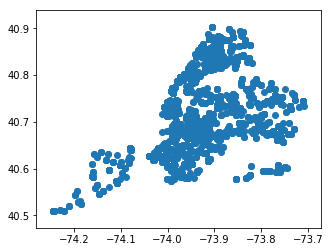

In [37]:
#create a "geography" from lat and long columns

active_geo = active.dropna(subset=['Latitude','Longitude'])
active_geo['lonlat'] = list((zip(active_geo.Longitude, active_geo.Latitude)))
active_geo['geometry'] = active_geo[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
active_geo = gp.GeoDataFrame(active_geo)

active_geo.plot()

In [39]:
active_geo.crs = from_epsg(4326)

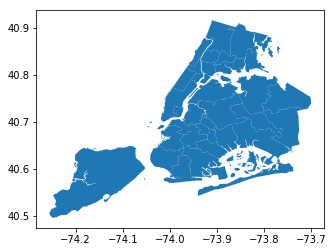

In [42]:
#https://data.cityofnewyork.us/Education/School-Districts/r8nu-ymqj#revert
#read in shapefile of nyc school districts from nyc open data

url = 'https://data.cityofnewyork.us/api/geospatial/r8nu-ymqj?method=export&format=Shapefile'

sd = gp.GeoDataFrame.from_file(url)

sd.plot();

In [40]:
#check so see if crs matches
sd.crs

{'init': 'epsg:4326'}

In [53]:
#set both geodataframes to ny state plane projection
#active_geo.to_crs(epsg=2263, inplace=True)
#sd.to_crs(epsg=2263, inplace=True)

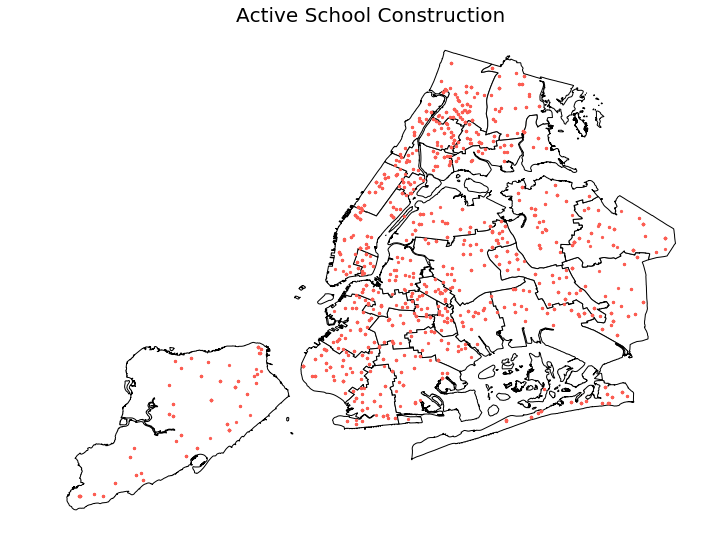

In [54]:
#plot school construction over school districts
#I don't include lat/long axes here b/c nyc borough shapes are easily recognizable

fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')
ax.axis('off')
plt.title("Active School Construction", fontsize=20)

sd.plot(facecolor='w', edgecolor='k', ax=ax)

active_geo.plot(c='#FC5D52', markersize=5,  ax=ax);


In [38]:
active_geo['Project Description'].unique()

array(['Addition', 'Demo', 'New', 'Lease', 'Interior',
       'PLANYC BOILER CNVRSN/PLANYC CLIMATE CTRL',
       'WATER PENETRATION/PLANYC BOILER/PLANYC CLIMATE',
       'SANDY - INSTALL TEMPORARY BOILERS',
       'FY16 RESO A PLAYGROUND REDVELOPMENT',
       'ROOFS/PARAPETS/EXT MASONRY/EXT DOORS',
       'FULL PROGRAM ACCESSIBILITY/LOW VOLTAGE ELECTRICAL',
       'FY13 RESO A PLAYGROUND REDEVELOPMENT',
       'EXTERIOR MASONRY/PARAPETS', 'KITCHEN FLOORING/FLOOD/ANSUL SYSTEM',
       'PLANYC BOILER/PLANYC CLIMATE CTRL/FIRE ALARM',
       'AUDITORIUM UPGRADE',
       'PARAPETS/FLOOD ELIMINATION/ROOFS/MASONRY/GYM UPG',
       'PUBLIC ADDRESS SYSTEM REPLACEMENT',
       'EXT MASONRY/FLOOD ELIMINATION/PARAPETS/ROOFS',
       'LOW VOLTAGE ELEC SYSTEM/ANSUL SYSTEM',
       'PLAYNYC BOILER CONVERSION/CLIMATE CONTROL',
       'PARAPET/ROOFS/EXT MASONRY',
       'WATER INFILTRATION/FLOOD/PARAPETS/ROOFS',
       'FY 15 RESO A ROOM CONVERSION', 'SCIENCE LAB UPGRADES',
       'EXTERIOR MASONRY', '

In [55]:
#create a dataframe with projects that mention sandy in the description
active_geo.dropna(subset=['Project Description'], inplace=True)
sandy = active_geo[active_geo['Project Description'].str.contains('SANDY')]

In [56]:
sandy.shape

(61, 23)

In [57]:
#create a dataframe with only projects described as "New"
new_active = active[active['Project Description'] == 'New']

new_active.shape

(55, 21)

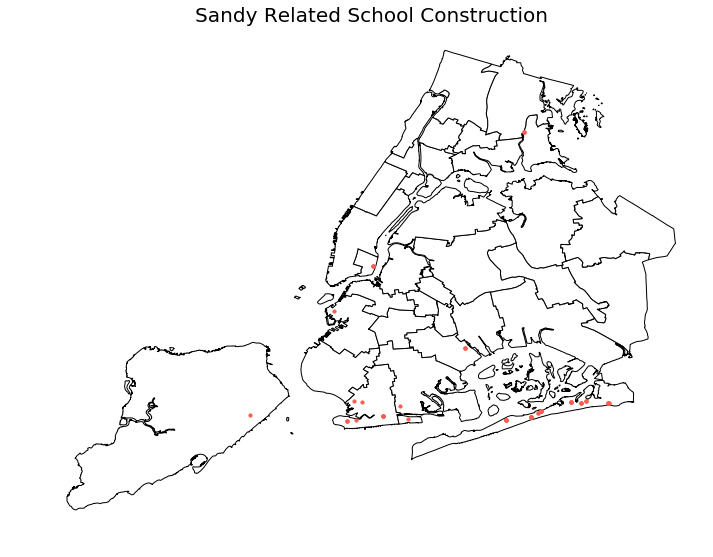

In [61]:
#plot school construction over school districts
#I don't include lat/long axes here b/c nyc borough shapes are easily recognizable

fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')
ax.axis('off')
plt.title("Sandy Related School Construction", fontsize=20)

sd.plot(facecolor='w', edgecolor='k', ax=ax)

sandy.plot(c='#FC5D52', markersize=10,  ax=ax);

In [ ]:
act